# Predicting heart disease using Machine Learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repository.

There is also a verison of it available on Kaggle

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we''ll persue the project.

## 4. Features
This is where you'll get different information about each of the features in your data.

**Data Dictionary**

* age in years
* sex (1=male; 0=female)
* cpchest pain type
* trestbpsresting blood pressure (in mm Hg on admission to the hospital)
* cholserum cholestoral in mg/dl
* fbs(fasting blood sugar > 120 mg/dl)(1 = true; 0 = false)
* ...
* ...
* target1 or 0

## Preparing the tools

We're going to use pandas, numpy and matplotlib for data analysis and manipulation.

In [80]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
# We want our plots to be displayed inside our notebook

# Import models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

## Load Data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape # (rows, cols)

(303, 14)

## Data exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with

1. What question(s) you are trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should we care about them?
5. How can you add, change or remove features to get more out of your data? 

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Let's find out how many of each class there are
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

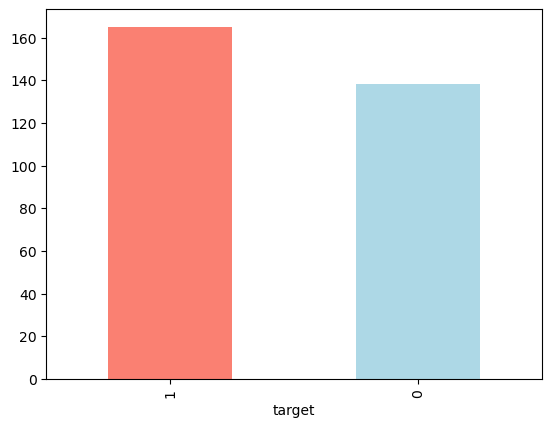

In [6]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex 

In [10]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
# Compare target column with Sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


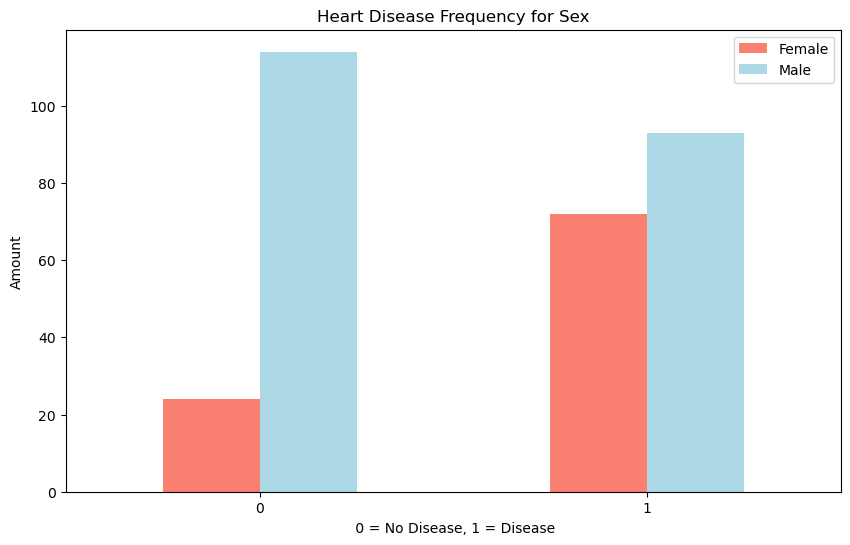

In [12]:
# Create a plot of the crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"]);

plt.title("Heart Disease Frequency for Sex")
plt.xlabel(" 0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

In [13]:
df.thal.value_counts()

thal
2    166
3    117
1     18
0      2
Name: count, dtype: int64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

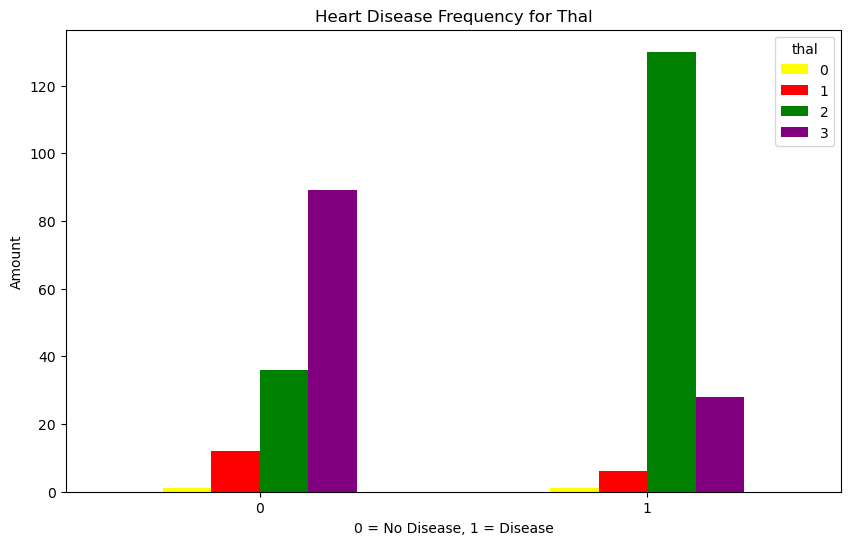

In [14]:
pd.crosstab(df.target, df.thal).plot(kind="bar", figsize=(10,6), color=["Yellow", "Red", "Green", "Purple"]);
plt.title("Heart Disease Frequency for Thal")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.xticks(rotation=0)

In [15]:
df.exang.value_counts()

exang
0    204
1     99
Name: count, dtype: int64

In [16]:
pd.crosstab(df.target, df.exang)

exang,0,1
target,,
0,62,76
1,142,23


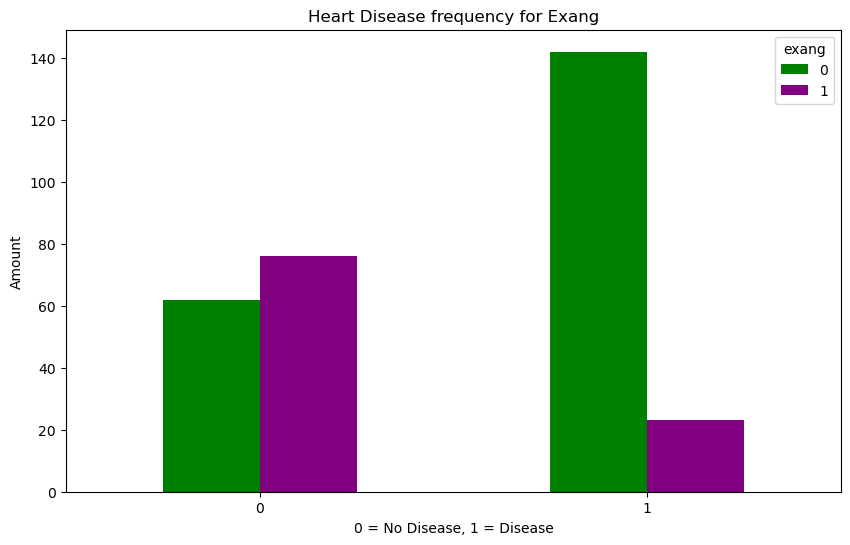

In [17]:
pd.crosstab(df.target, df.exang).plot(kind="bar", figsize=(10,6), color=["Green", "Purple"]);
plt.title("Heart Disease frequency for Exang")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.xticks(rotation=0);

In [18]:
df["thalach"].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

### Age V/S Max Heart Rate for Heart Disease  

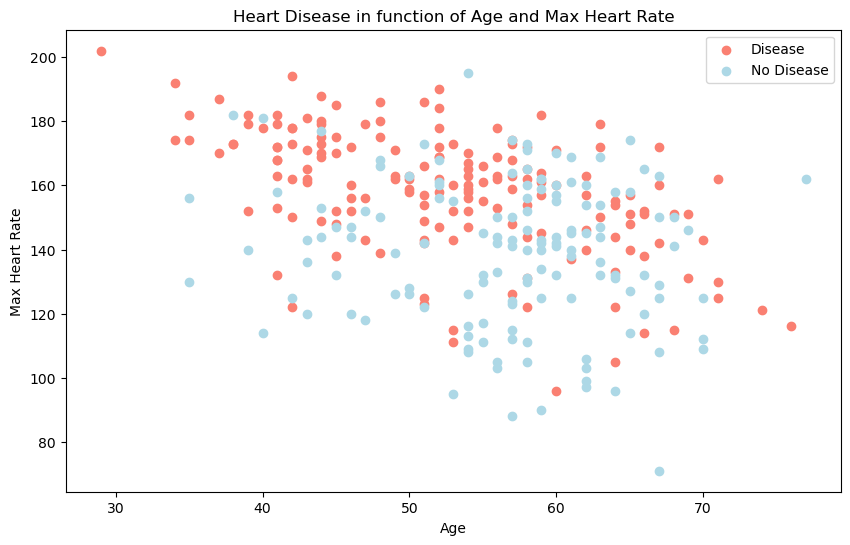

In [19]:
# Create another figure
plt.figure(figsize= (10,6))

# Scatter with positive examples first
plt.scatter(df.age[df.target == 1], 
            df.thalach[df.target == 1],
            c="salmon");

# Scatter with negative examples
plt.scatter(df.age[df.target == 0], 
            df.thalach[df.target == 0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

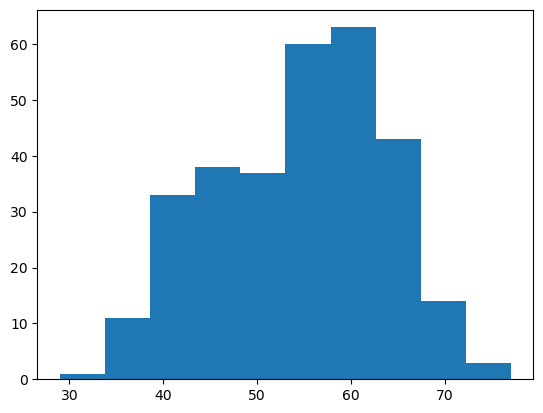

In [20]:
# Check the distribution of the `Age` column with a Histogram
plt.hist(df.age);

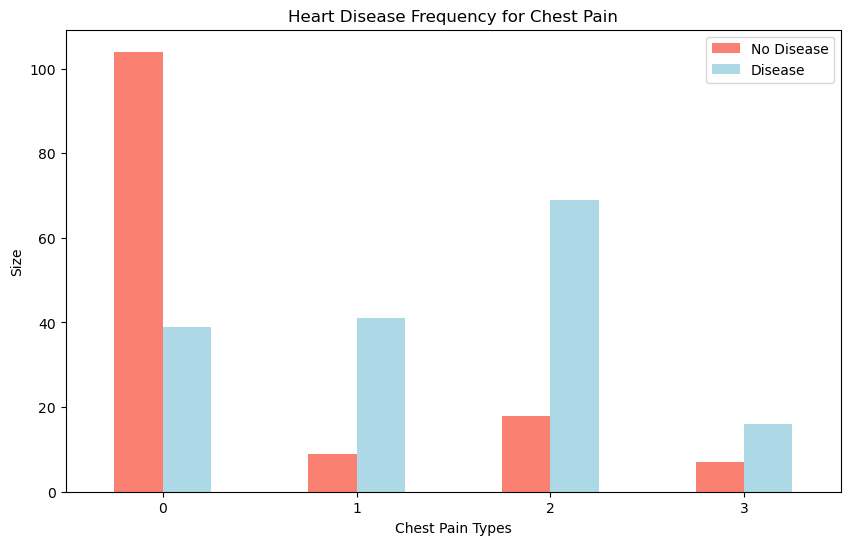

In [21]:
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency for Chest Pain")
plt.xlabel("Chest Pain Types")
plt.ylabel("Size")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [22]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


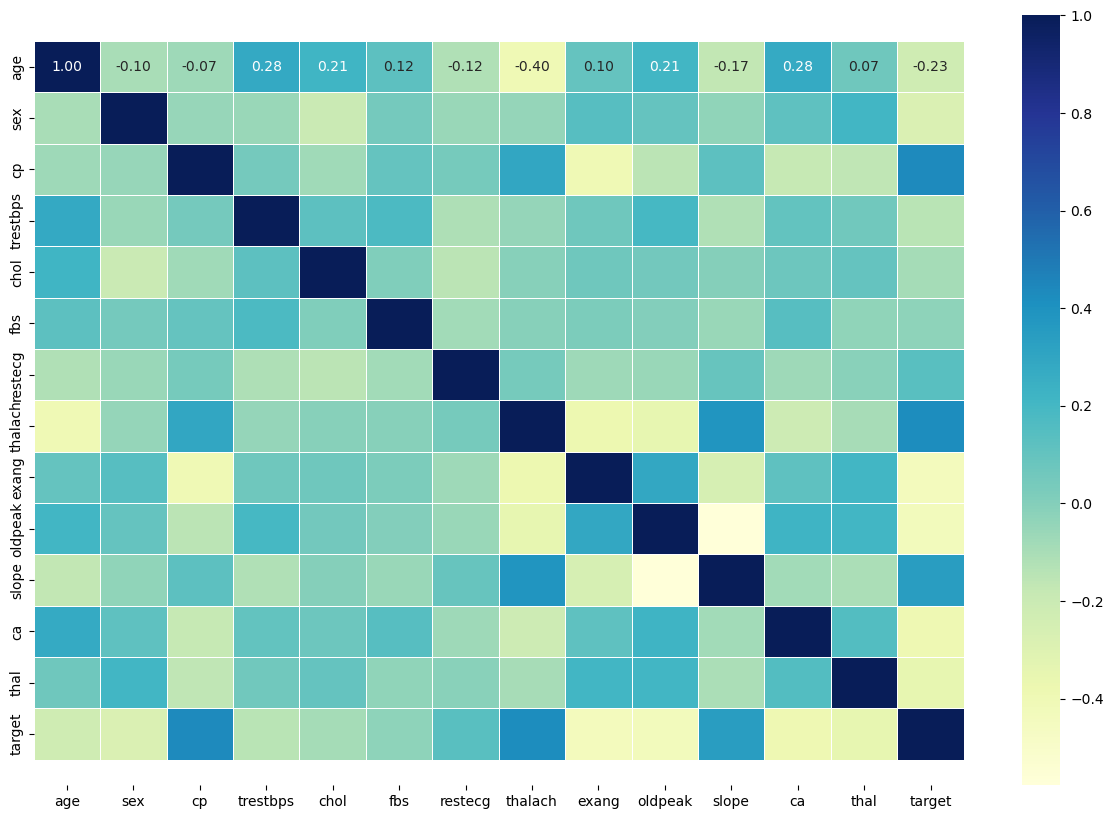

In [23]:
# Let's make our correlation matrix a little bit preetier

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show();

## 5. Modelling

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


We are going to try three different models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [25]:
# Put Models in a dictionary
models = {"Logistic Regression" : LogisticRegression(),
          "KNN" : KNeighborsClassifier(),
          "Random Forest" : RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluate given machine learning models.
    models: a dict of different scikit-learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : testing labels
    """

    # Set the random seed
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_scores = {}

    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append it's score to model_scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores


X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

C:\Users\gauta\OneDrive\Desktop\heart-disease\env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8032786885245902,
 'KNN': 0.5737704918032787,
 'Random Forest': 0.7540983606557377}

### Model Comparison

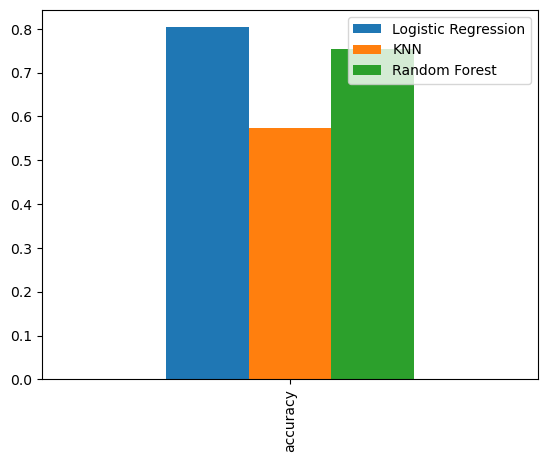

In [26]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.plot.bar();

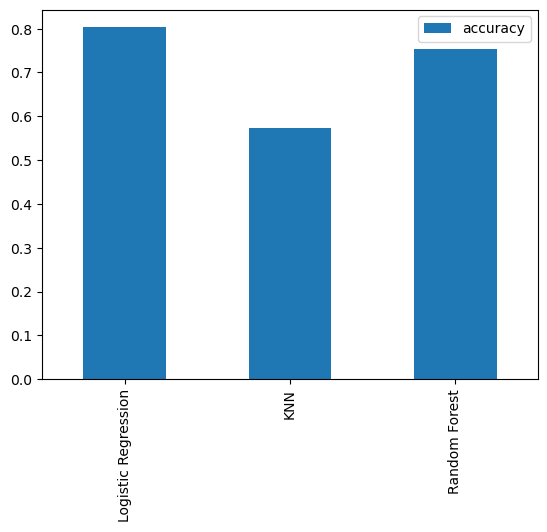

In [27]:
model_compare.T.plot.bar();

Now we've got a baseline model, and we should know a model's first predictions aren't always what we should based our next step off. What should we do?

Let's look at the following:
* Hyperparameter tuning
* Feature Importance
* Confusion Matrix
* Cross Validation
* Precision
* Recall
* F1 score
* Classification Report
* ROC Curve
* Area under the curve (AUC)

### Hyperparameter tuning by hand

In [28]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1,21)

# Set up KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)

    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))

    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))


In [29]:
train_scores

[1.0,
 0.7975206611570248,
 0.7892561983471075,
 0.8057851239669421,
 0.78099173553719,
 0.768595041322314,
 0.7768595041322314,
 0.7768595041322314,
 0.756198347107438,
 0.71900826446281,
 0.7272727272727273,
 0.731404958677686,
 0.731404958677686,
 0.731404958677686,
 0.7355371900826446,
 0.7355371900826446,
 0.7272727272727273,
 0.743801652892562,
 0.7272727272727273,
 0.7396694214876033]

In [30]:
test_scores

[0.47540983606557374,
 0.45901639344262296,
 0.6065573770491803,
 0.6229508196721312,
 0.5737704918032787,
 0.5737704918032787,
 0.6229508196721312,
 0.5901639344262295,
 0.5901639344262295,
 0.5901639344262295,
 0.5737704918032787,
 0.6065573770491803,
 0.5901639344262295,
 0.5737704918032787,
 0.5737704918032787,
 0.5901639344262295,
 0.5737704918032787,
 0.5901639344262295,
 0.5573770491803278,
 0.5573770491803278]

Maximum KNN score on the test data: 62.30%


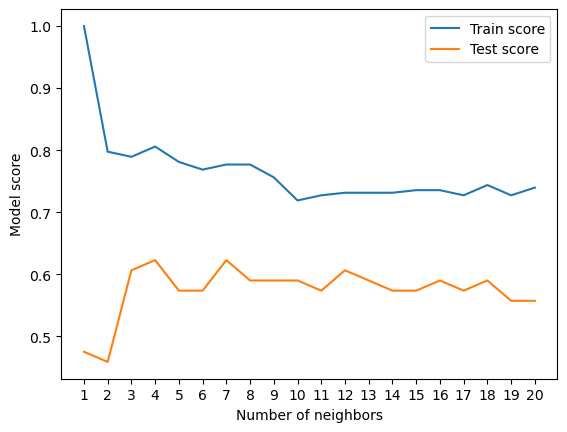

In [31]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

We are going to tune:
* LogisticRegression()
* RandomForestClassifier()
using RandomizedSearchCV

In [32]:
# Create a hyperparameter for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a Hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparamter grids setup for each of our models let's tune them using our RandomizedSearchCV

In [33]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random Hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [34]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [35]:
rs_log_reg.score(X_test, y_test)

0.819672131147541

Now we've tuned LogisticRegression let's do the same for RandomForestClassifier

In [36]:
# Setup Random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
# Fit Random Hyperparamter search model for random forest classifier
rs_rf.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [37]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 12,
 'min_samples_leaf': 5,
 'max_depth': None}

In [38]:
# Evaluate the RandomizedSearch RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.7540983606557377

In [39]:
model_scores

{'Logistic Regression': 0.8032786885245902,
 'KNN': 0.5737704918032787,
 'Random Forest': 0.7540983606557377}

## Hyperparameter tuning with GridSearchCV

Since our LogisticRegressionModel provides the best scores so far we'll try and imporve them again using GridSearchCV

In [40]:
# Different hyperparameters for our LogisticRegression Model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup Grid Hyperparamter for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit our grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [41]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 62.10169418915616, 'solver': 'liblinear'}

In [42]:
# Evaluate the Grid search LogisticRegression Model
gs_log_reg.score(X_test, y_test)

0.8032786885245902

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification Report
* Precision
* Recall
* F1-Score

...and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [43]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [44]:
y_preds

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [45]:
y_test

223    0
204    0
277    0
8      1
220    0
      ..
59     1
143    1
263    0
283    0
16     1
Name: target, Length: 61, dtype: int64

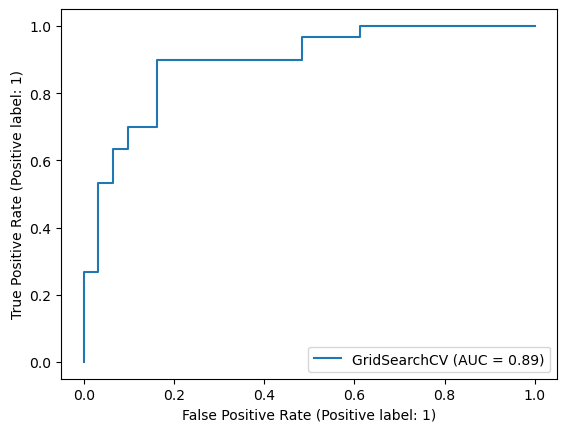

In [58]:
# Plot ROC curve and calculate the AUC metric

RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)

In [88]:
# Confusion Matrix

print(confusion_matrix(y_test, y_preds))

[[22  9]
 [ 3 27]]


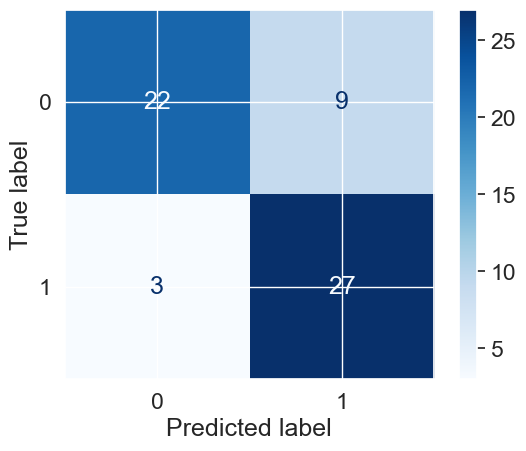

In [97]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using seaborn's heatmap
    """
    disp = ConfusionMatrixDisplay.from_estimator(
        gs_log_reg,
        X_test,
        y_test,
        cmap=plt.cm.Blues
    )
    """
    ax = sns.heatmap(ConfusionMatrixDisplay.from_estimator(gs_log_reg, y_test, y_preds),
                      annot=True,
                      cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom - 0.1, top+0.1)
    """

plot_conf_mat(y_test, y_preds);

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.

In [98]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.71      0.79        31
           1       0.75      0.90      0.82        30

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.82      0.80      0.80        61



### Calculate evaluation metrics using cross validation 

We're going to calculate accuracy, precision, recall and f1-score of our model using cross validation and to do so we'll be using `cross_val_score()`. 

In [100]:
# Check best hyper parameters
gs_log_reg.best_params_

{'C': 62.10169418915616, 'solver': 'liblinear'}

In [101]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=62.10169418915616, solver="liblinear")

In [108]:
# Cross-validated accuracy

cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.80327869, 0.8852459 , 0.83606557, 0.86666667, 0.76666667])

In [110]:
cv_acc = np.mean(cv_acc)
cv_acc

0.831584699453552

In [114]:
# Cross-validated Precison
cv_prec = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_prec

array([0.78378378, 0.90625   , 0.84848485, 0.83783784, 0.74358974])

In [115]:
cv_prec = cv_prec.mean()
cv_prec

0.8239892427392427

In [116]:
# Cross-validate Recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

array([0.87878788, 0.87878788, 0.84848485, 0.93939394, 0.87878788])

In [117]:
cv_recall = cv_recall.mean()
cv_recall

0.8848484848484848

In [120]:
# Cross-validated F1-Score
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f1

array([0.82857143, 0.89230769, 0.84848485, 0.88571429, 0.80555556])

In [121]:
cv_f1 = cv_f1.mean()
cv_f1

0.8521267621267622

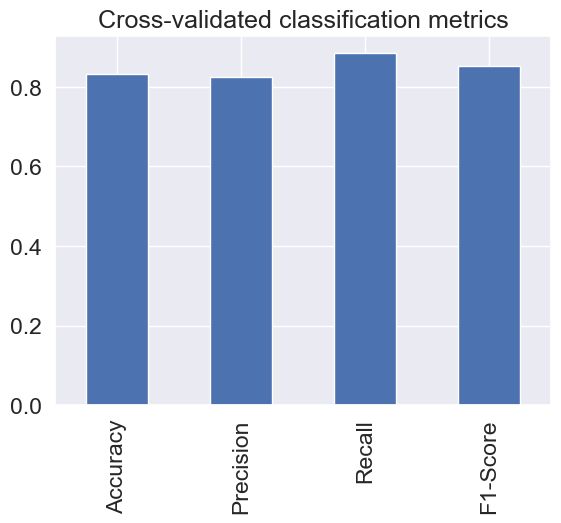

In [136]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                           "Precision":cv_prec,
                           "Recall": cv_recall,
                           "F1-Score":cv_f1},
                           index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics", legend=False);

### Feature Importance

Feature importance is another way of asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find out feature importance is to search for "(MODEL NAME) feature importance".

Let's find out our feature importance for our LogisticRegression Model...

In [140]:
# Fit an instance of Logistic Regression

gs_log_reg.best_params_

clf = LogisticRegression(C = 62.10169418915616, solver = "liblinear")

clf.fit(X_train, y_train);

In [142]:
# Check coef_
clf.coef_

# What `coef_` attribute does is basically tells us how a particular feature contributes to predict the `target` variable

array([[-0.00857106, -1.39674252,  0.92690907, -0.01853242, -0.00317512,
        -0.06614856,  0.69334281,  0.0240826 , -1.04766436, -0.67892734,
         0.60869727, -0.93428361, -0.79443961]])

In [145]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [146]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': -0.008571061439657567,
 'sex': -1.3967425186979565,
 'cp': 0.9269090748591176,
 'trestbps': -0.01853242198069935,
 'chol': -0.0031751160144785854,
 'fbs': -0.06614855544652627,
 'restecg': 0.6933428109907591,
 'thalach': 0.024082597119058545,
 'exang': -1.0476643628932973,
 'oldpeak': -0.678927341731398,
 'slope': 0.6086972748883881,
 'ca': -0.9342836095636639,
 'thal': -0.794439614155344}

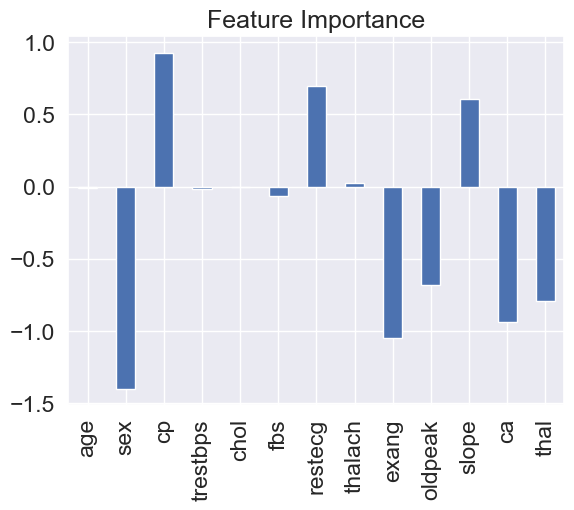

In [147]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

## 6. Experimentation

If you haven't hit your evaluation metric yet... ask yourself...

* Could you collect more data?
* Could you try a better model? like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we have done so far)
* If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?